<a href="https://colab.research.google.com/github/tasawar301/final_year_ocular/blob/main/Ocular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OCULAR DISEASE RECOGNITION**

### **Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2

### **READ DATASET FROM KAGGLE**

In [6]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("andrewmvd/ocular-disease-recognition-odir5k")

# print("Path to dataset files:", path)

In [7]:
path = 'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset'

In [8]:
data_df = pd.read_csv(path+'/full_df.csv')

In [9]:
print("Size: "+ str(data_df.shape)+"\n\n")
display(data_df.info())
data_df.head()


Size: (6392, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   i

None

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                     target     filename  
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg

## **EXPLORATORY DATA ANALYSIS**



### **1) Numerial data analysis**

In [10]:
data_df.describe()

ID  Patient Age            N            D            G  \
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000   
mean   2271.150814    57.857947     0.328692     0.332134     0.062109   
std    1417.559018    11.727737     0.469775     0.471016     0.241372   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%     920.750000    51.000000     0.000000     0.000000     0.000000   
50%    2419.500000    59.000000     0.000000     0.000000     0.000000   
75%    3294.000000    66.000000     1.000000     1.000000     0.000000   
max    4784.000000    91.000000     1.000000     1.000000     1.000000   

                 C            A            H            M            O  
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000  
mean      0.062891     0.049906     0.031758     0.047872     0.248436  
std       0.242786     0.217768     0.175370     0.213513     0.432139  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [11]:
data_df.describe(include='object')

Patient Sex    Left-Fundus    Right-Fundus Left-Diagnostic Keywords  \
count         6392           6392            6392                     6392   
unique           2           3358            3358                      196   
top           Male  4690_left.jpg  4690_right.jpg            normal fundus   
freq          3424              2               2                     2796   

       Right-Diagnostic Keywords  \
count                       6392   
unique                       205   
top                normal fundus   
freq                        2705   

                                                 filepath labels  \
count                                                6392   6392   
unique                                               6392      8   
top     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
freq                                                    1   2873   

                          target       filename  
count                       6392           6392  
unique                         8           6392  
top     [1, 0, 0, 0, 0, 0, 0, 0]  4784_left.jpg  
freq                        2873              1

In [12]:
data_df.isnull().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

In [13]:
data_df.apply(lambda x: len(x.unique()))

ID                           3358
Patient Age                    75
Patient Sex                     2
Left-Fundus                  3358
Right-Fundus                 3358
Left-Diagnostic Keywords      196
Right-Diagnostic Keywords     205
N                               2
D                               2
G                               2
C                               2
A                               2
H                               2
M                               2
O                               2
filepath                     6392
labels                          8
target                          8
filename                     6392
dtype: int64

In [14]:
data_df.duplicated().sum()

np.int64(0)

In [15]:
data_df['labels'].value_counts()

labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64

# **RESEARCH QUESTION ONE:** Study the impact of chronic conditions (hypertension and diabetes) over the ocular disease while studying the image patterns of these 2 diseases and compare it with the age

## **Diabetes analysis**

In [16]:
diabete_df = data_df[data_df['labels']=='[\'D\']']
# display(diabete_df.head())
display(diabete_df.shape)

(1608, 19)

#### **Testing the Difference between the age of Diabetic and non-diabetic patients**

Diabetes Patients Age Statistics:
count    1608.000000
mean       55.699627
std        10.200721
min        17.000000
25%        49.000000
50%        56.000000
75%        63.000000
max        85.000000
Name: Patient Age, dtype: float64

Non-Diabetes Patients Age Statistics:
count    4784.000000
mean       58.583403
std        12.113070
min         1.000000
25%        52.000000
50%        60.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64 


T-test results: t-statistic=-8.578673730990161, p-value=1.191093099934713e-17



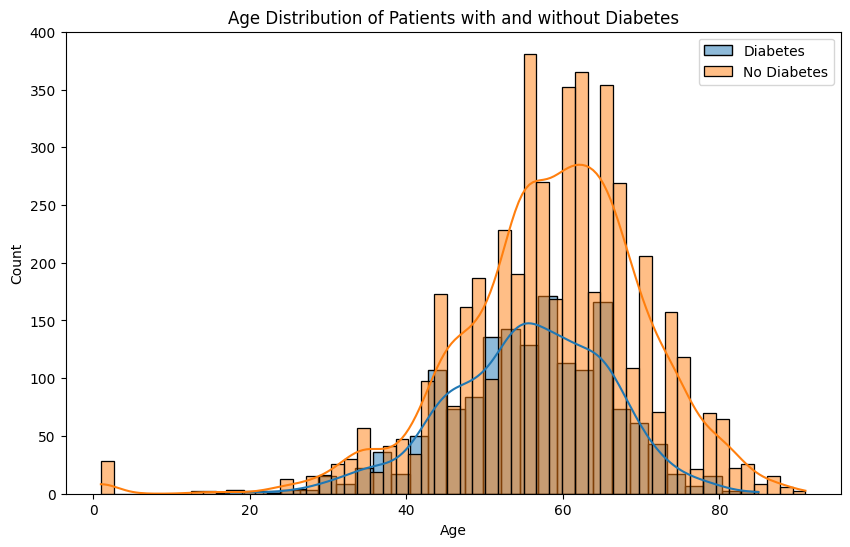

In [17]:
# diabetes_patients = data_df[data_df['labels'] == "['D']"]
non_diabetes_df = data_df[data_df['labels'] != "['D']"]

print("Diabetes Patients Age Statistics:")
print(diabete_df['Patient Age'].describe())

print("\nNon-Diabetes Patients Age Statistics:")
print(non_diabetes_df['Patient Age'].describe(),"\n")

t_statistic, p_value = ttest_ind(diabete_df['Patient Age'], non_diabetes_df['Patient Age'])
print(f"\nT-test results: t-statistic={t_statistic}, p-value={p_value}\n")

plt.figure(figsize=(10, 6))
sns.histplot(diabete_df['Patient Age'], kde=True, label='Diabetes')
sns.histplot(non_diabetes_df['Patient Age'], kde=True, label='No Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Diabetes')
plt.legend()
plt.show()

The t-test results indicate a statistically significant difference in age between patients diagnosed with diabetes and those without. Let's break down the values:

* **t-statistic = -8.57867:** This value represents the difference between the means of the two groups (diabetes patients and non-diabetes patients) in units of standard error.  A large absolute value of the t-statistic suggests a substantial difference between the group means.  The negative sign indicates that the average age of diabetes patients is *lower* than the average age of non-diabetes patients in this dataset.

* **p-value = 1.191093e-17:** This is a very small number (close to zero).  The p-value represents the probability of observing the obtained difference in means (or a more extreme difference) if there were *actually no difference* in the underlying population means.  A small p-value (typically below 0.05) indicates strong evidence *against* the null hypothesis (that there's no difference in age between the two groups).  In this case, the extremely small p-value provides very strong evidence that the observed age difference is not due to random chance.

**Conclusion:**

The results strongly suggest that there is a statistically significant difference in age between patients with and without diabetes in your dataset. The average age of diabetic patients is notably lower than the average age of non-diabetic patients.  The extremely low p-value reinforces the high confidence in this conclusion.

#### Diabetes in terms of age categories

Now Lets define the age categories for diabetes class, to monitor how the age are diseases features are related


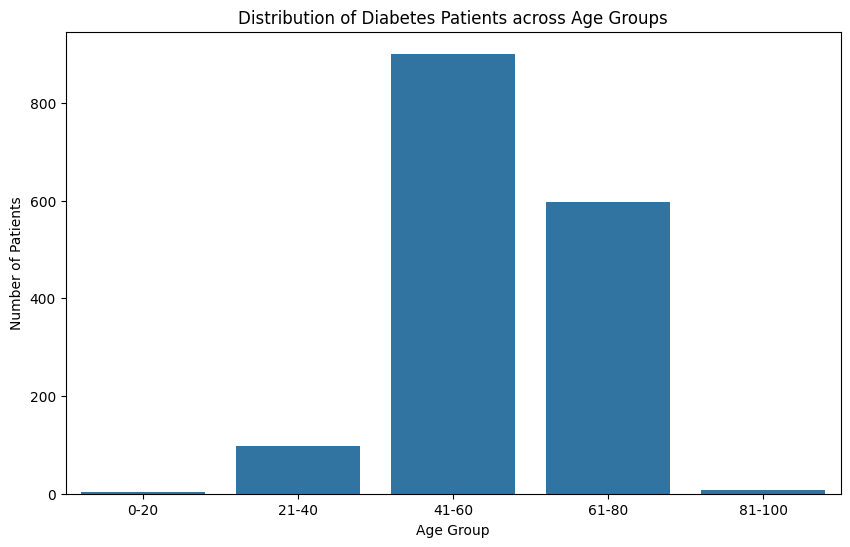

In [18]:
# Dividing the diabetes data into different ages groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
diabete_df['Age_Group'] = pd.cut(diabete_df['Patient Age'], bins=bins, labels=labels, right=False)

# age_group_counts = diabete_df['Age_Group'].value_counts().sort_index()
# print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=diabete_df)
plt.title('Distribution of Diabetes Patients across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


From Above plot, it can be seen the age group 41-60 have majority of diabetes cases followed by the 61-80 group. and around 100+ cases are reported belonging to the age group of 21-40. beside these 3 groups there are rare cases which fall in other category. although they are very few, but they still be considered for observing the pattern of the diabetes impact on fundus images.

#### **Compare the Severity of Diabetes over the Age Category**

In [19]:
# diabete_df['Right-Diagnostic Keywords'].unique()

From the above diagnoses, different categories are extracted based on their critical stages that are:
 - diabetic retinopathy: these are the general or post treatment cases (or can say have history of it)
 - Mild nonproliferative retinopathy
 - Moderate nonproliferative retinopathy
 - severe nonproliferative retinopathy
 - proliferative retinopathy (most critical cases - might need surgery)

 since it is possible that the diabete only affect one eye or the multiple ocular disease symptoms are observes. for these cases two further stages of disease are added that are:
 - Normal
 - other non-diabetic symptoms

In [20]:
keywords = ['mild nonproliferative retinopathy', 'moderate non proliferative retinopathy',
            'severe proliferative diabetic retinopathy', 'proliferative', 'diabetic retinopathy','normal fundus']

def filter_keywords(text):
  if isinstance(text, str):
    for keyword in keywords:
      if keyword in text.lower():
        return keyword
  return "non-diabetic symptoms"


diabete_df['Left_diabete_stage'] = diabete_df['Left-Diagnostic Keywords'].apply(filter_keywords)
diabete_df['Right_diabete_stage'] = diabete_df['Right-Diagnostic Keywords'].apply(filter_keywords)


In [21]:
diabete_stage_df = diabete_df[['ID','Patient Age','Patient Sex','Age_Group','Left_diabete_stage','Right_diabete_stage']]

In [22]:
diabete_stage_df

ID  Patient Age Patient Sex Age_Group  \
2        2           42        Male     41-60   
3        4           53        Male     41-60   
4        5           50      Female     41-60   
5        6           60        Male     61-80   
6        7           60      Female     61-80   
...    ...          ...         ...       ...   
6385  4682           45        Male     41-60   
6387  4686           63        Male     61-80   
6388  4688           42        Male     41-60   
6389  4689           54        Male     41-60   
6390  4690           57        Male     41-60   

                          Left_diabete_stage  \
2     moderate non proliferative retinopathy   
3                      non-diabetic symptoms   
4     moderate non proliferative retinopathy   
5                      non-diabetic symptoms   
6                      non-diabetic symptoms   
...                                      ...   
6385       mild nonproliferative retinopathy   
6387                           proliferative   
6388  moderate non proliferative retinopathy   
6389       mild nonproliferative retinopathy   
6390       mild nonproliferative retinopathy   

                         Right_diabete_stage  
2     moderate non proliferative retinopathy  
3          mild nonproliferative retinopathy  
4     moderate non proliferative retinopathy  
5     moderate non proliferative retinopathy  
6          mild nonproliferative retinopathy  
...                                      ...  
6385  moderate non proliferative retinopathy  
6387                           proliferative  
6388  moderate non proliferative retinopathy  
6389                           normal fundus  
6390       mild nonproliferative retinopathy  

[1608 rows x 6 columns]

Combine the diabete stages such that if the patient have severe in left eye and mild in right eye the combine column will hold the value of severe. in short the more critical diagonises are given piority while generating the comhine diabetes stage

In [23]:
def combine_diabete_stages(row):
  left_stage = row['Left_diabete_stage']
  right_stage = row['Right_diabete_stage']

  if 'severe' in str(left_stage).lower() or 'severe' in str(right_stage).lower():
    return 'severe'
  elif 'moderate' in str(left_stage).lower() or 'moderate' in str(right_stage).lower():
    return 'moderate'
  elif 'mild' in str(left_stage).lower() or 'mild' in str(right_stage).lower():
    return 'mild'
  elif 'proliferative' in str(left_stage).lower() or 'proliferative' in str(right_stage).lower():
    return 'proliferative'
  elif 'diabetic retinopathy' in str(left_stage).lower() or 'diabetic retinopathy' in str(right_stage).lower():
    return 'diabetic'
  elif 'normal' in str(left_stage).lower() or 'normal' in str(right_stage).lower():
    return 'normal'
  else:
    return 'non-diabetic symptoms'

diabete_stage_df['Combined_diabete_stage'] = diabete_stage_df.apply(combine_diabete_stages, axis=1)
diabete_stage_df


ID  Patient Age Patient Sex Age_Group  \
2        2           42        Male     41-60   
3        4           53        Male     41-60   
4        5           50      Female     41-60   
5        6           60        Male     61-80   
6        7           60      Female     61-80   
...    ...          ...         ...       ...   
6385  4682           45        Male     41-60   
6387  4686           63        Male     61-80   
6388  4688           42        Male     41-60   
6389  4689           54        Male     41-60   
6390  4690           57        Male     41-60   

                          Left_diabete_stage  \
2     moderate non proliferative retinopathy   
3                      non-diabetic symptoms   
4     moderate non proliferative retinopathy   
5                      non-diabetic symptoms   
6                      non-diabetic symptoms   
...                                      ...   
6385       mild nonproliferative retinopathy   
6387                           proliferative   
6388  moderate non proliferative retinopathy   
6389       mild nonproliferative retinopathy   
6390       mild nonproliferative retinopathy   

                         Right_diabete_stage Combined_diabete_stage  
2     moderate non proliferative retinopathy               moderate  
3          mild nonproliferative retinopathy                   mild  
4     moderate non proliferative retinopathy               moderate  
5     moderate non proliferative retinopathy               moderate  
6          mild nonproliferative retinopathy                   mild  
...                                      ...                    ...  
6385  moderate non proliferative retinopathy               moderate  
6387                           proliferative          proliferative  
6388  moderate non proliferative retinopathy               moderate  
6389                           normal fundus                   mild  
6390       mild nonproliferative retinopathy                   mild  

[1608 rows x 7 columns]

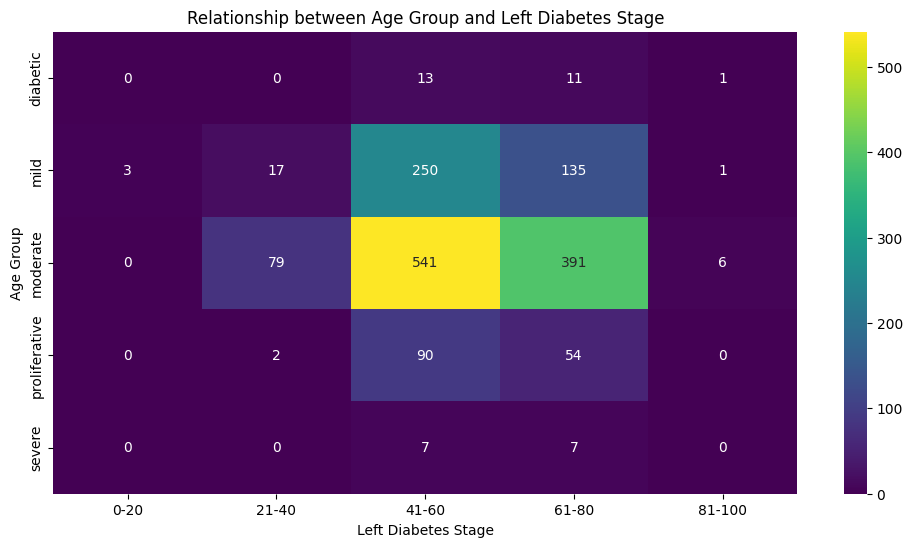

Chi-square statistic: 39.08075165556195
P-value: 0.0010588038543547227
Reject the null hypothesis: There is a significant relationship between Age group and Diabete Stages.


In [24]:
age_stage_crosstab = pd.crosstab(diabete_stage_df['Combined_diabete_stage'], diabete_stage_df['Age_Group'])
# display(age_stage_crosstab)

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(age_stage_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Age Group and Left Diabetes Stage')
plt.xlabel('Left Diabetes Stage')
plt.ylabel('Age Group')
plt.show()


# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(age_stage_crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Age group and Diabete Stages.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")

#### **Conclusion**
A Significant relationship is reported by chi-square test between age group and diabete stages.
Crosstab shows that the early age groups doesnot have severe and or proliferative(critical) cases, all of the severe and proliferative cases are reported in the later age groups. where as the mild cases are even reported in the very age group (i.e., 0-20 group). and the Moderate cases stages from the 21-40 age group and increases in the later groups.

#### **Fundus images of Diabete stages over age group**
Observing these diabetes stages over the age category

In [25]:
import os
def trim_and_replace(filepath):
    filename = os.path.basename(filepath)
    new_filepath = os.path.join("/ODIR-5K/ODIR-5K/Training Images", filename)
    return new_filepath

In [26]:
import requests
import io
from PIL import Image

def load_image_from_github(image_url):
    response = requests.get(image_url, stream=True)
    response.raise_for_status()
    image = Image.open(io.BytesIO(response.content))
    return image

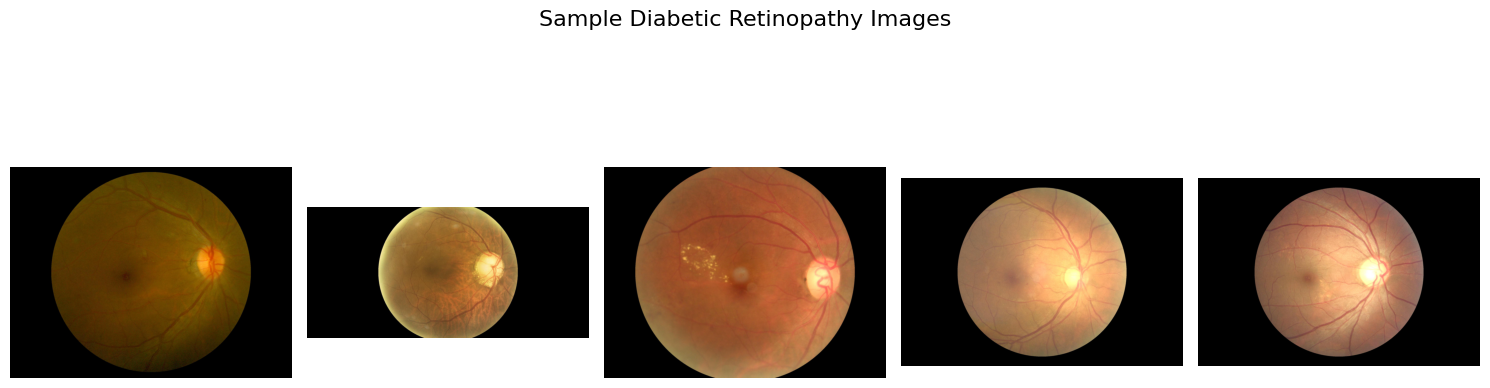

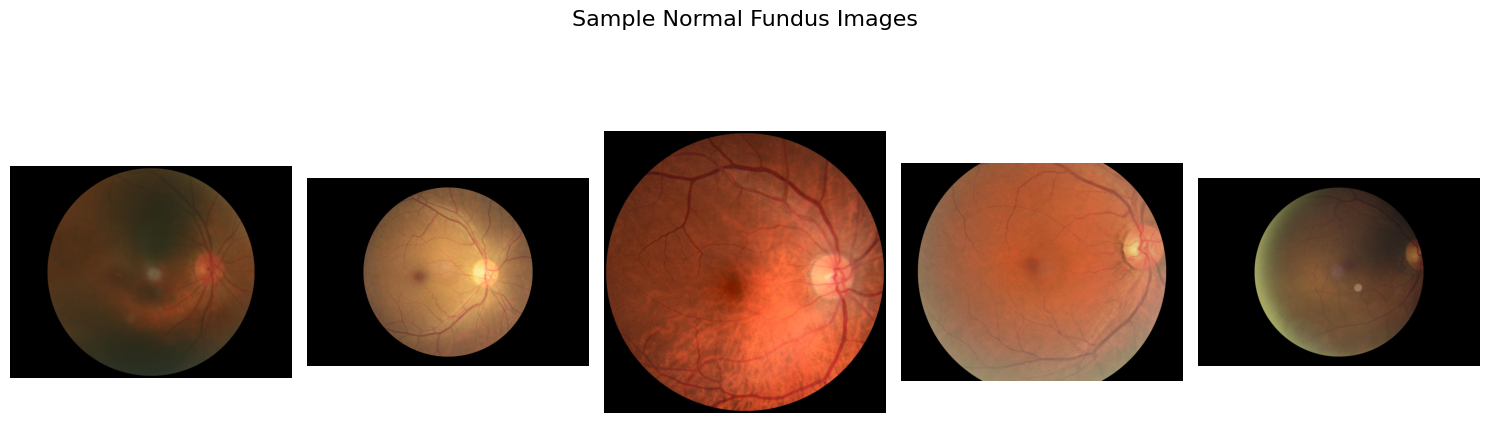

In [27]:
def display_image_comparison(df, title):
    image_paths = []
    for index, row in df.iterrows():
        image_path = path + trim_and_replace(row['filepath'])
        image_paths.append(image_path)

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i in range(5):
      try:
          img = load_image_from_github(image_paths[i])
          axes[i].imshow(img)
          axes[i].axis('off')
      except FileNotFoundError:
          print(f"Image not found: {image_paths[i]}")
      except IndexError:
          pass
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Display a few images for diabetes patients
display_image_comparison(diabete_df.head(), "Sample Diabetic Retinopathy Images")

# Display a few images for normal patients
display_image_comparison(data_df[data_df['labels']=="['N']"].head(), "Sample Normal Fundus Images")


In [28]:
bb = diabete_df[diabete_df['Left_diabete_stage'].isin(['moderate non proliferative retinopathy',
       'mild nonproliferative retinopathy',
       'diabetic retinopathy', 'proliferative',
       'severe proliferative diabetic retinopathy'])]

In [29]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load Pretrained Model (Feature Extractor)
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-2])  # Keep feature maps
model.eval()

# Define Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_and_visualize_features(image_path):

    img = load_image_from_github(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Extract Features
    with torch.no_grad():
        features = model(img_tensor)

    # Convert Features to Heatmap
    feature_map = features.squeeze().numpy()  # Remove batch dimension
    feature_map = np.mean(feature_map, axis=0)  # Average over channels
    feature_map = cv2.resize(feature_map, (img.width, img.height))  # Resize to match original image size

    # Normalize heatmap for visualization
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

    # Convert heatmap to color
    heatmap = cv2.applyColorMap(np.uint8(255 * feature_map), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Blend heatmap with original image
    img_np = np.array(img)
    overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

    # Display Original & Highlighted Image
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img)
    ax[0].axis("off")
    ax[0].set_title("Original Image")

    ax[1].imshow(overlay)
    ax[1].axis("off")
    ax[1].set_title("Feature Heatmap Overlay")

    plt.show()


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]




Age Group: 41-60
Diabetes Stage: diabetic retinopathy


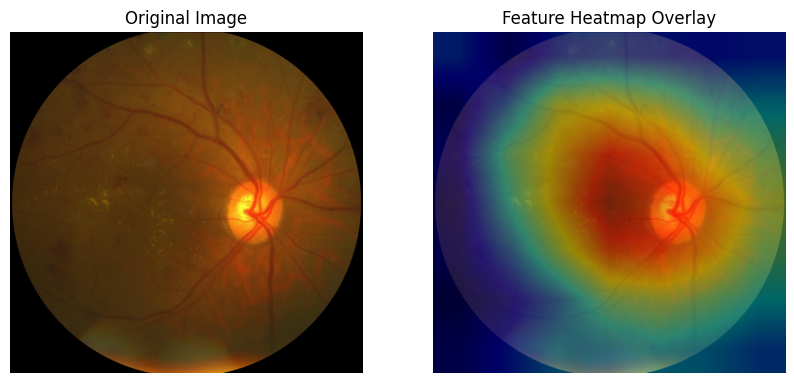

Diabetes Stage: mild nonproliferative retinopathy


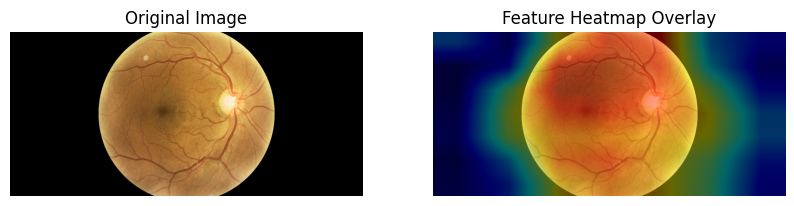

Diabetes Stage: moderate non proliferative retinopathy


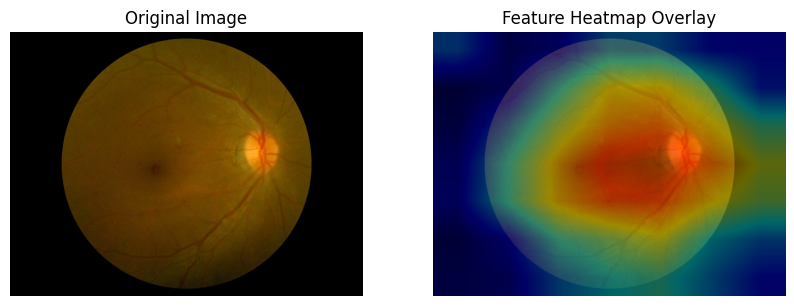

Diabetes Stage: proliferative


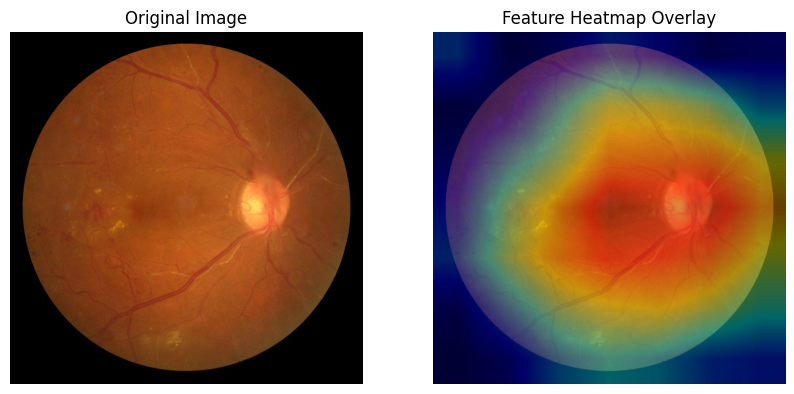

Diabetes Stage: severe proliferative diabetic retinopathy


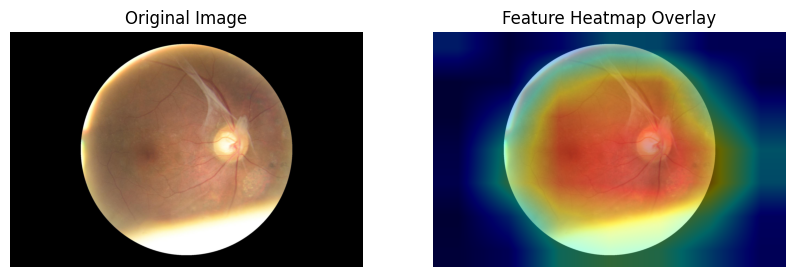



Age Group: 61-80
Diabetes Stage: diabetic retinopathy


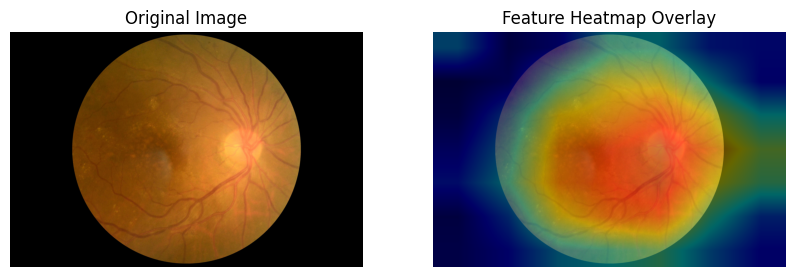

Diabetes Stage: mild nonproliferative retinopathy


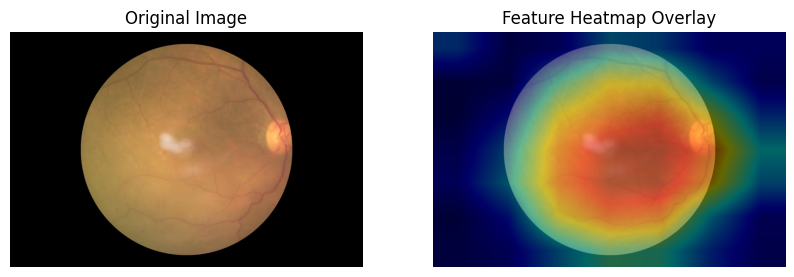

Diabetes Stage: moderate non proliferative retinopathy


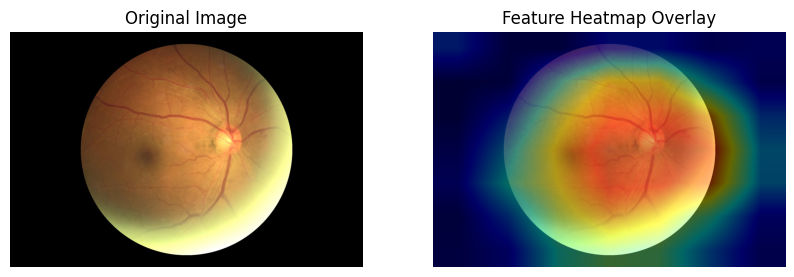

Diabetes Stage: proliferative


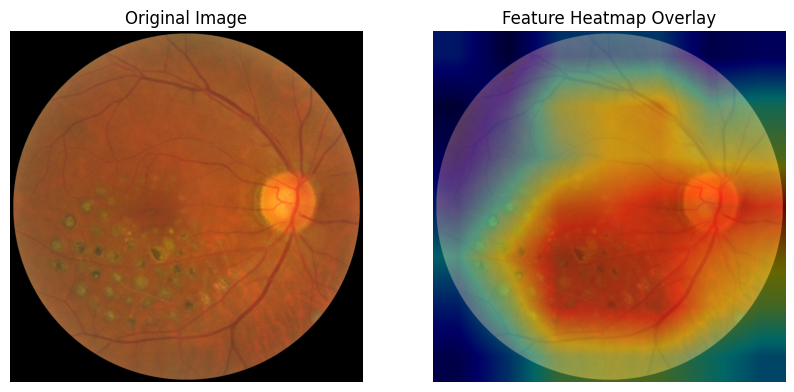

Diabetes Stage: severe proliferative diabetic retinopathy


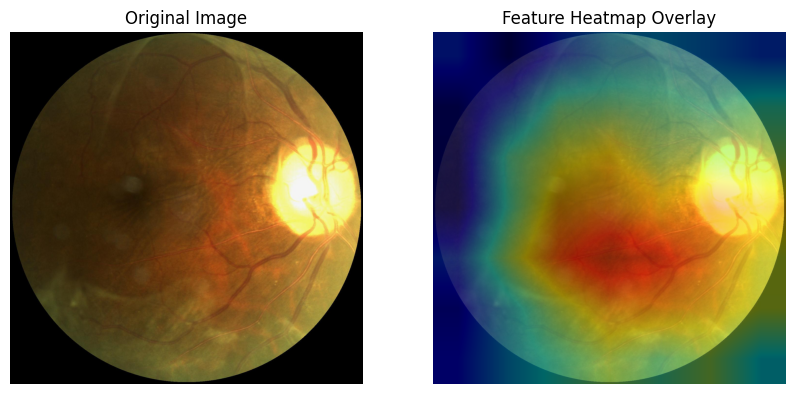



Age Group: 81-100
Diabetes Stage: diabetic retinopathy


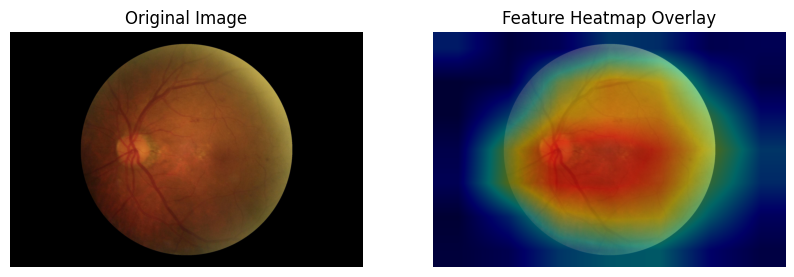

Diabetes Stage: moderate non proliferative retinopathy


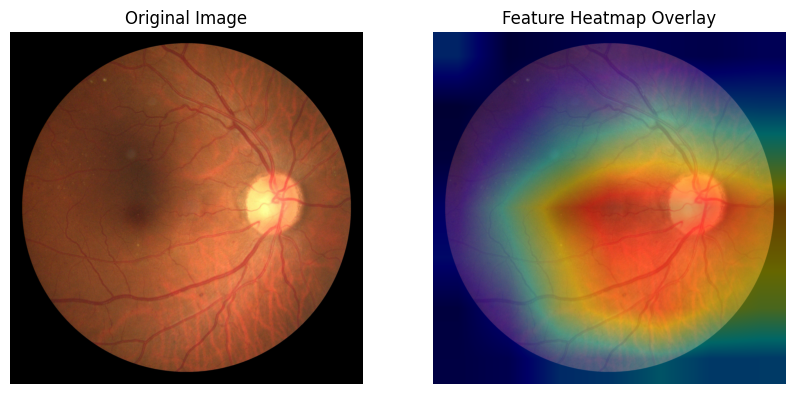



Age Group: 21-40
Diabetes Stage: mild nonproliferative retinopathy


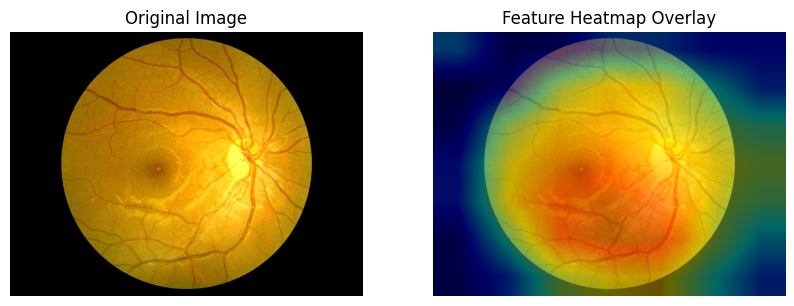

Diabetes Stage: moderate non proliferative retinopathy


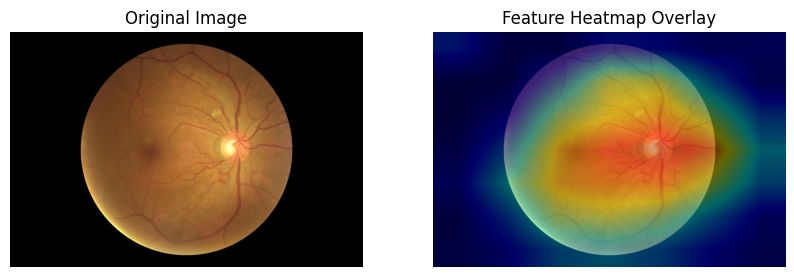

Diabetes Stage: proliferative


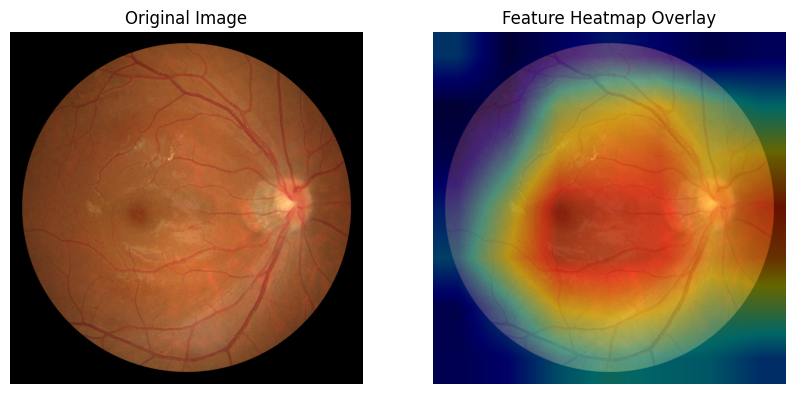



Age Group: 0-20
Diabetes Stage: mild nonproliferative retinopathy


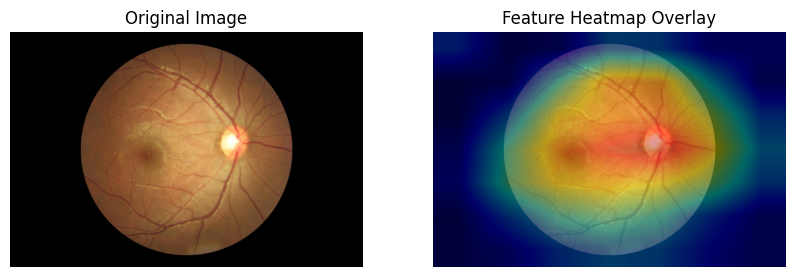

In [30]:
for age in bb['Age_Group'].unique():
  print("\n\nAge Group: "+age)
  aa = bb[bb['Age_Group']==age].groupby('Left_diabete_stage')['filepath'].first().reset_index()
  for index, row in aa.iterrows():
    print(f"Diabetes Stage: {row['Left_diabete_stage']}")
    extract_and_visualize_features(path+trim_and_replace(row['filepath']))

## **Hypertension analysis**

In [31]:
hypertension_df = data_df[data_df['labels']=='[\'H\']']
display(hypertension_df.head())
display(hypertension_df.shape)

ID  Patient Age Patient Sex  Left-Fundus  Right-Fundus  \
19  23           47        Male  23_left.jpg  23_right.jpg   
23  28           63      Female  28_left.jpg  28_right.jpg   
26  32           64      Female  32_left.jpg  32_right.jpg   
36  45           54        Male  45_left.jpg  45_right.jpg   
51  62           50        Male  62_left.jpg  62_right.jpg   

    Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  H  M  \
19  hypertensive retinopathy  hypertensive retinopathy  0  0  0  0  0  1  0   
23  hypertensive retinopathy  hypertensive retinopathy  0  0  0  0  0  1  0   
26  hypertensive retinopathy  hypertensive retinopathy  0  0  0  0  0  1  0   
36  hypertensive retinopathy  hypertensive retinopathy  0  0  0  0  0  1  0   
51  hypertensive retinopathy  hypertensive retinopathy  0  0  0  0  0  1  0   

    O                                           filepath labels  \
19  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   
23  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   
26  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   
36  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   
51  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   

                      target      filename  
19  [0, 0, 0, 0, 0, 1, 0, 0]  23_right.jpg  
23  [0, 0, 0, 0, 0, 1, 0, 0]  28_right.jpg  
26  [0, 0, 0, 0, 0, 1, 0, 0]  32_right.jpg  
36  [0, 0, 0, 0, 0, 1, 0, 0]  45_right.jpg  
51  [0, 0, 0, 0, 0, 1, 0, 0]  62_right.jpg

(128, 19)

#### **Testing the Difference between the age of Hypertension and non-hypertension patients**

Hypertension Patients Age Statistics:
count    128.000000
mean      57.046875
std        7.519905
min       37.000000
25%       52.000000
50%       58.000000
75%       63.000000
max       70.000000
Name: Patient Age, dtype: float64

Non-hypertension Patients Age Statistics:
count    6264.000000
mean       57.874521
std        11.797897
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64 


T-test results: t-statistic=-0.790369458628053, p-value=0.42934136343078255



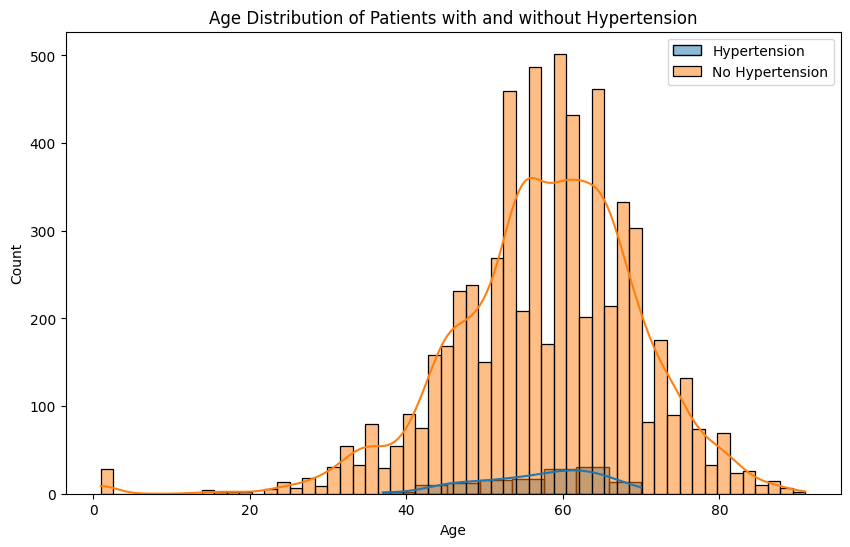

In [32]:
non_hypertension_df = data_df[data_df['labels'] != "['H']"]

print("Hypertension Patients Age Statistics:")
print(hypertension_df['Patient Age'].describe())

print("\nNon-hypertension Patients Age Statistics:")
print(non_hypertension_df['Patient Age'].describe(),"\n")

t_statistic, p_value = ttest_ind(hypertension_df['Patient Age'], non_hypertension_df['Patient Age'])
print(f"\nT-test results: t-statistic={t_statistic}, p-value={p_value}\n")

plt.figure(figsize=(10, 6))
sns.histplot(hypertension_df['Patient Age'], kde=True, label='Hypertension')
sns.histplot(non_hypertension_df['Patient Age'], kde=True, label='No Hypertension')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Hypertension')
plt.legend()
plt.show()

The t-test results indicate no statistically significant difference in age between patients diagnosed with hypertension and those without. Let's break down the values:
Your t-test results indicate the following:

- **t-statistic = -0.79:** This measures the difference between two group means relative to the variability within the groups. A t-value close to zero suggests little difference between the groups.

- **p-value = 0.429:** This tells us the probability of observing the data assuming the null hypothesis (no difference between groups) is true. A common significance threshold is 0.05. Since 0.429 is much greater than 0.05, we fail to reject the null hypothesis.

**Conclusion:**
the test results strongly suggest that there is no statistically significant difference the age between patient with and without hypertension.
the Average of both groups are almost same.
The observed difference (if any) is likely due to random chance rather than a real effect.



#### Hypertension in terms of age categories

Now Lets define the age categories for hypertension class, to monitor how the age and diseases features are related


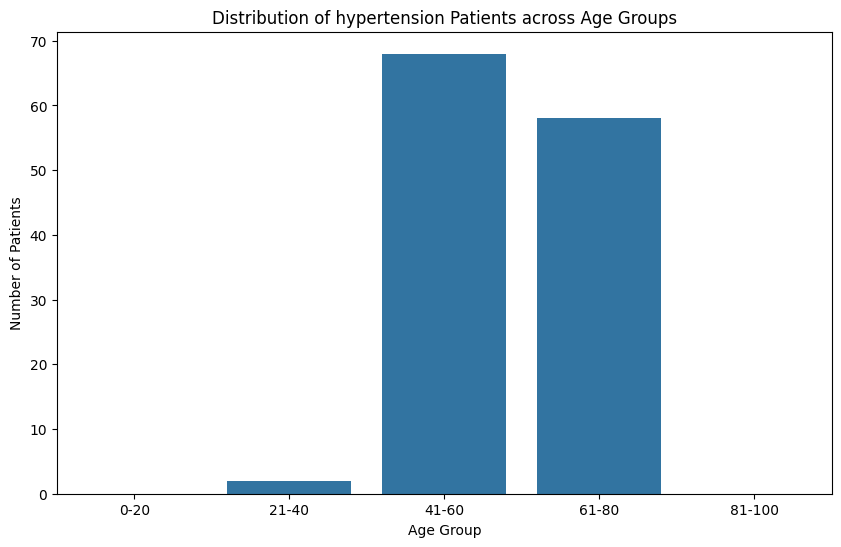

In [33]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
hypertension_df['Age_Group'] = pd.cut(hypertension_df['Patient Age'], bins=bins, labels=labels, right=False)

# age_group_counts = hypertension_df['Age_Group'].value_counts().sort_index()
# print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=hypertension_df)
plt.title('Distribution of hypertension Patients across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


From Above plot, it can be seen the age group 41-60 have majority of diabetes cases followed by the 61-80 group. and few cases are reported belonging to the age group of 21-40. beside these 3 groups there are zero cases which fall in other category.

#### **Compare the Severity of Hypertension over the Age Category**

In [34]:
hypertension_df['Right-Diagnostic Keywords'].unique()

array(['hypertensive retinopathy',
       'hypertensive retinopathy，macular epiretinal membrane',
       'hypertensive retinopathy，cataract',
       'hypertensive retinopathy，suspected glaucoma',
       'hypertensive retinopathy，mild nonproliferative retinopathy',
       'hypertensive retinopathy，branch retinal vein occlusion',
       'hypertensive retinopathy，suspected diabetic retinopathy',
       'hypertensive retinopathy，moderate non proliferative retinopathy',
       'hypertensive retinopathy，maculopathy',
       'hypertensive retinopathy，branch retinal vein occlusion，vitreous opacity',
       'hypertensive retinopathy，diabetic retinopathy',
       'hypertensive retinopathy，age-related macular degeneration',
       'wet age-related macular degeneration，hypertensive retinopathy',
       'old branch retinal vein occlusion',
       'proliferative diabetic retinopathy，hypertensive retinopathy',
       'glaucoma，hypertensive retinopathy',
       'dry age-related macular degeneration',


From the above diagnoses, it is observe that there is not different stages of hypertension are present, i.e, there is only one sympton noted that say hypertension retinopathy.

Since there is not stages is reported, we cannot further explore the hypertension in terms of stages.


#### **Conclusion**
It have been observe that there is no significant impact of ages over the hypertension. although it is a chronic disease, but it doesnot possess stages to further study them.

There is possibility that this conclusion is highly baised due to the lack of hypertension data. the normal cases above 2000 whereas the hypertension cases are below 200.

#### **Fundus images of Hypertension**
Still we can Observing the features of hypertension from the fundus images

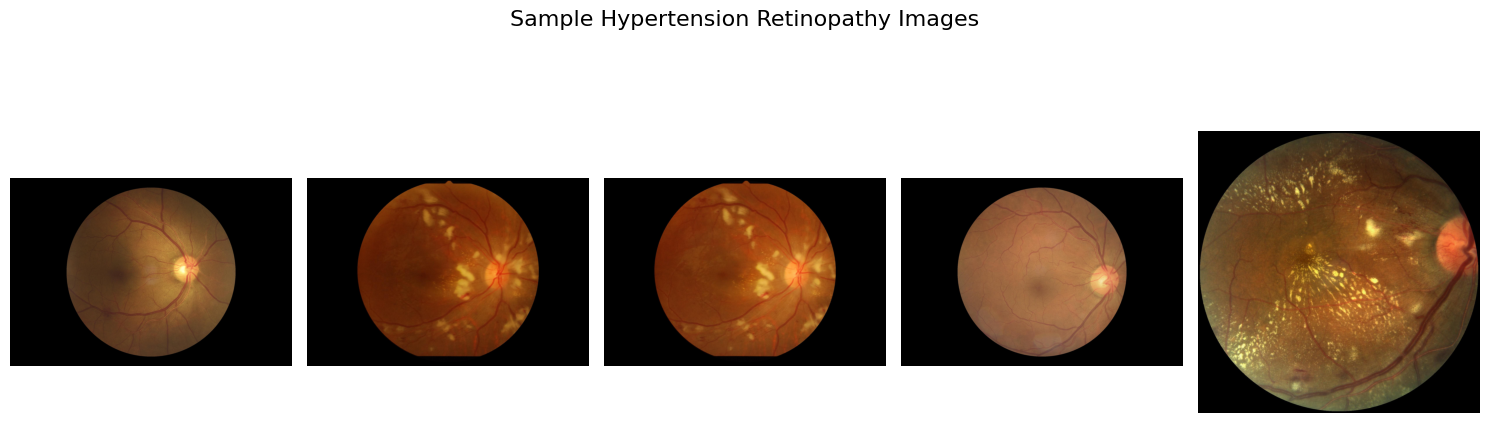

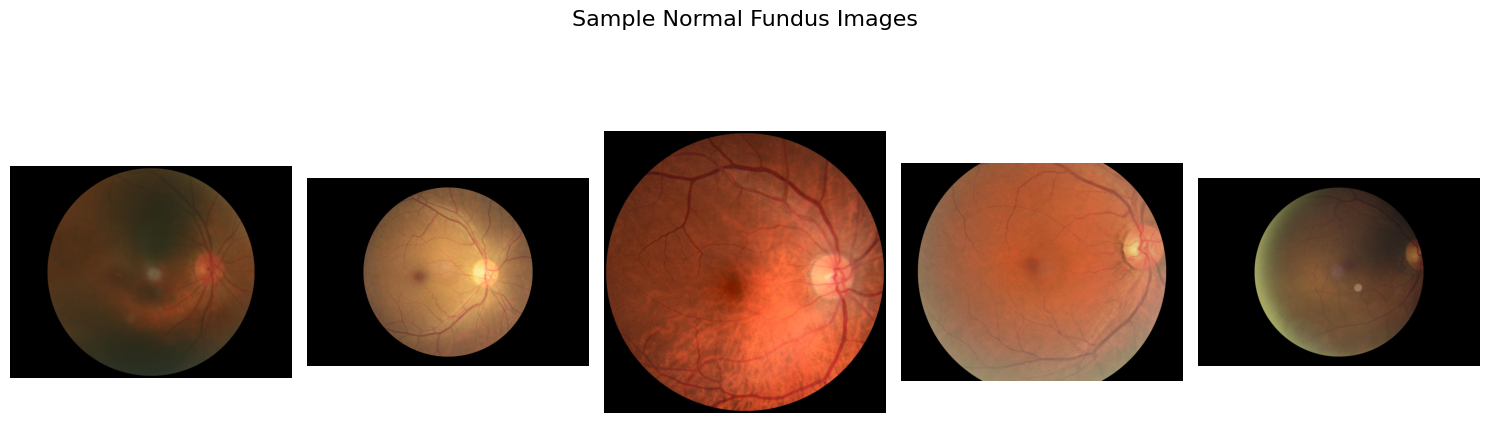

In [35]:
# Display a few images for Hypertension patients
display_image_comparison(hypertension_df.head(), "Sample Hypertension Retinopathy Images")

# Display a few images for normal patients
display_image_comparison(data_df[data_df['labels']=="['N']"].head(), "Sample Normal Fundus Images")




Age Group: 41-60


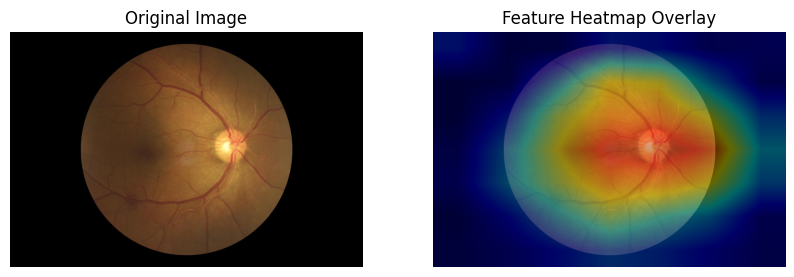

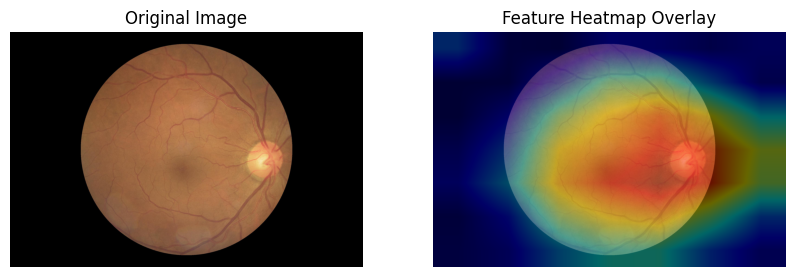



Age Group: 61-80


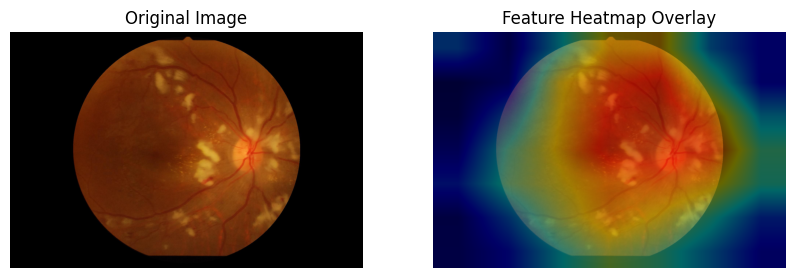

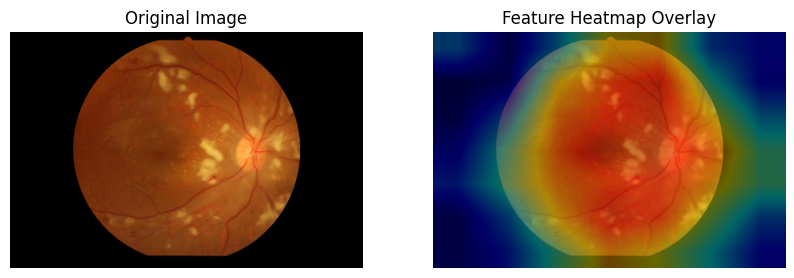



Age Group: 21-40


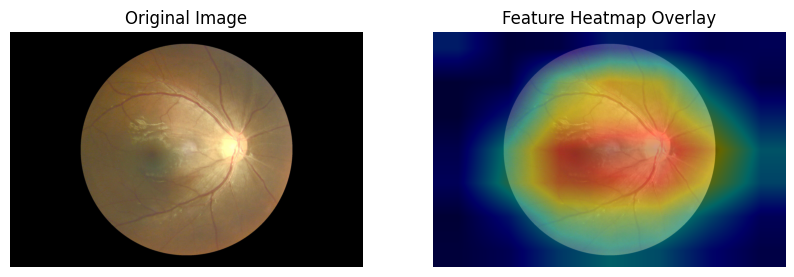

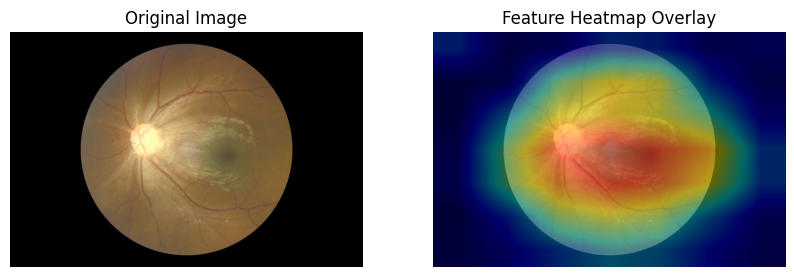

In [36]:
for age in hypertension_df['Age_Group'].unique():
  print("\n\nAge Group: "+age)
  aa = hypertension_df[hypertension_df['Age_Group']==age].iloc[0:2]
  for index, row in aa.iterrows():
    # print(f"Hypertension")
    extract_and_visualize_features(path+trim_and_replace(row['filepath']))

# **RESEARCH QUESTION TWO:** Study the contagious nature of each disease by monitoring the association between the left and right eye disease.

In [37]:
# We'll create a contingency table to analyze the association between diseases in the left and right eyes.
disease_df = data_df[data_df['labels'] != "['N']"]
contingency_table = pd.crosstab(disease_df['Left-Diagnostic Keywords'], disease_df['Right-Diagnostic Keywords'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

if p < 0.05:
  print("There is a statistically significant association between diseases in the left and right eyes.")
else:
  print("There is no statistically significant association between diseases in the left and right eyes.")


Chi-square statistic: 163571.824470491
P-value: 0.0
There is a statistically significant association between diseases in the left and right eyes.


In [38]:
# top 10 most frequent combinations of left and right eye diseases
top_10_combinations = contingency_table.stack().sort_values(ascending=False).head(10)
print("Top 10 most frequent combinations of left and right eye diseases:")
top_10_combinations


Top 10 most frequent combinations of left and right eye diseases:


Left-Diagnostic Keywords                Right-Diagnostic Keywords             
moderate non proliferative retinopathy  moderate non proliferative retinopathy    452
cataract                                cataract                                  158
dry age-related macular degeneration    dry age-related macular degeneration      158
glaucoma                                glaucoma                                  154
mild nonproliferative retinopathy       mild nonproliferative retinopathy         150
pathological myopia                     pathological myopia                       150
severe nonproliferative retinopathy     severe nonproliferative retinopathy       110
mild nonproliferative retinopathy       moderate non proliferative retinopathy     88
normal fundus                           mild nonproliferative retinopathy          87
drusen                                  drusen                                     76
dtype: int64

**Conclusion on Research Question 2:**

From the above analysis it is observe that most of the eye diseases are contagious. from the top 10 diseases that mostly occur are the chronic diseases that affect both eyes together, however there is possibility the severity of disease may vary from eye to eye.

# **RESEARCH QUESTION THREE:** Predictive Model to predict the disease type from the image dataset


### Removing Class imbalance problem

250 images of all category will be considered

In [39]:
data_df['labels'].value_counts()

labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64

In [40]:
N_df = data_df[data_df['labels']=="['N']"].head(250)
D_df = data_df[data_df['labels']=="['D']"].head(250)
O_df = data_df[data_df['labels']=="['O']"].head(250)
C_df = data_df[data_df['labels']=="['C']"].head(250)
G_df = data_df[data_df['labels']=="['G']"].head(250)
A_df = data_df[data_df['labels']=="['A']"].head(250)
M_df = pd.concat([data_df[data_df['labels']=="['M']"],data_df[data_df['labels']=="['M']"].head(18)],axis=0)
H_df = pd.concat([data_df[data_df['labels']=="['H']"],data_df[data_df['labels']=="['H']"].head(122)],axis=0)

In [41]:
df_concat = pd.concat([N_df, D_df, O_df, C_df, G_df, A_df,M_df,H_df], axis=0)
df_concat['labels'].value_counts()

labels
['N']    250
['D']    250
['O']    250
['C']    250
['G']    250
['A']    250
['M']    250
['H']    250
Name: count, dtype: int64

### Label Encoding

In [42]:
df_concat['labels'].replace(["['N']", "['D']", "['O']", "['C']", "['G']", "['A']", "['M']",
       "['H']"],[0,1,2,3,4,5,6,7],inplace=True)

In [43]:
df_concat['labels'].value_counts()

labels
0    250
1    250
2    250
3    250
4    250
5    250
6    250
7    250
Name: count, dtype: int64

### **Image Preprocessing**

Preprocessing techniques are taken from this research papers (https://www.sciencedirect.com/science/article/pii/S1566253523003755#bib0007). in their work these preprocessing techniques greatly helps to improves the model performance, so same technique will be used in here. These techniques are:

- Circular Border Cropping
- Resizing to 224×224
- Contrast Enhancement using CLAHE
- Noise Reduction using Median Filtering
- Data Augmentation (Rotation, Flipping, Brightness & Saturation Adjustments)

In [44]:
import cv2
import os
import random
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow
import tensorflow as tf

def circular_border_crop(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 6, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])

        # **Fix: Avoid cropping too small regions**
        if w > 50 and h > 50:  # Ensure the cropped area isn't tiny
            return image[y:y+h, x:x+w]

    return image  # Return original if cropping fails

def resize_image(image, size=(224, 224)):
    """Resizes image to a fixed size (224x224)."""
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def enhance_contrast(image):
    """Applies CLAHE (Contrast Limited Adaptive Histogram Equalization)."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l, a, b = cv2.split(lab)  # Split channels

    clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8, 8))  # Define CLAHE
    l_clahe = clahe.apply(l)  # Apply CLAHE on L-channel

    enhanced_lab = cv2.merge((l_clahe, a, b))  # Merge channels
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)  # Convert back to BGR
    return enhanced_image

def remove_noise(image):
    """Applies median filtering to remove noise."""
    return cv2.medianBlur(image, 3)  # Median filter with 3x3 kernel

def augment_image(image):
    """Applies data augmentation including flipping, rotation, brightness, and saturation changes."""
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to PIL image

    # Random Rotation (±20 degrees)
    angle = random.uniform(-20, 20)
    pil_image = pil_image.rotate(angle)

    # Random Horizontal & Vertical Flip
    if random.random() > 0.5:
        pil_image = pil_image.transpose(Image.FLIP_LEFT_RIGHT)
    if random.random() > 0.5:
        pil_image = pil_image.transpose(Image.FLIP_TOP_BOTTOM)

    # Random Brightness Change
    enhancer = ImageEnhance.Brightness(pil_image)
    pil_image = enhancer.enhance(random.uniform(0.8, 1.2))

    # Random Saturation Change
    enhancer = ImageEnhance.Color(pil_image)
    pil_image = enhancer.enhance(random.uniform(0.8, 1.2))

    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)  # Convert back to OpenCV format

def preprocess_fundus_image(image_path):
    """Full preprocessing pipeline for fundus images."""
    image = load_image_from_github(image_path)  # Read image
    image = np.array(image)  # Convert to numpy array
    image = circular_border_crop(image)  # Step 1: Crop Borders
    image = resize_image(image)  # Step 2: Resize to 224x224
    image = enhance_contrast(image)  # Step 3: Contrast Enhancement (CLAHE)
    image = remove_noise(image)  # Step 4: Noise Reduction (Median Filtering)
    image = augment_image(image)  # Step 5: Data Augmentation

    return image

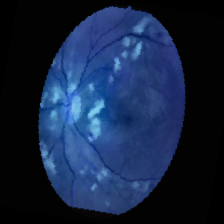

'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset/ODIR-5K/ODIR-5K/Training Images/32_right.jpg'

In [45]:
## Testing the preprocessing method on a single image
#  load_image_from_github(image_paths[i])
image_path = path + trim_and_replace(data_df[data_df['labels']=="['H']"].iloc[2]['filepath'])
processed_image = preprocess_fundus_image(image_path)
cv2_imshow(processed_image)
image_path

In [46]:
def preprocess_images_for_prediction(df, image_column, label_column, preprocess_func):
  X = []
  y = []
  for index, row in df.iterrows():
    image_path = path + trim_and_replace(row[image_column])
    try:
      processed_image = preprocess_func(image_path)
      X.append(processed_image)
      y.append(row[label_column])
    except Exception as e:
      print(f"Error processing image {image_path}: {e}")
  return X, y

X, y = preprocess_images_for_prediction(df_concat, 'filepath', 'labels', preprocess_fundus_image)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Convert data to NumPy arrays and normalize pixel values
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8)


### 1) VGGNet-19 model

In [49]:
base_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 classes for your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 417ms/step - accuracy: 0.1485 - loss: 3.7481 - val_accuracy: 0.3250 - val_loss: 1.8283
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.2590 - loss: 1.8960 - val_accuracy: 0.3025 - val_loss: 1.7427
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.2696 - loss: 1.8442 - val_accuracy: 0.3025 - val_loss: 1.7659
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 0.2759 - loss: 1.8314 - val_accuracy: 0.3600 - val_loss: 1.6919
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.3209 - loss: 1.7901 - val_accuracy: 0.3975 - val_loss: 1.6550
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.3376 - loss: 1.7370 - val_accuracy: 0.3250 - val_loss: 1.6690
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - accuracy: 0.2862 - loss: 1.7613 - val_accuracy: 0.3825 - val_loss: 1.6859
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.2827 - loss: 1.7669 - val_accu

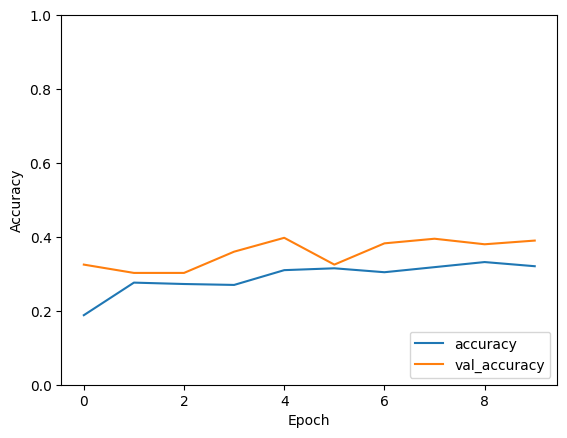

In [50]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### 2) RESNET-50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 271ms/step - accuracy: 0.1410 - loss: 2.2514 - val_accuracy: 0.1600 - val_loss: 2.0733
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.1657 - loss: 2.0685 - val_accuracy: 0.1175 - val_loss: 2.0720
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.1503 - loss: 2.0793 - val_accuracy: 0.1250 - val_loss: 2.0782
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.1309 - loss: 2.0790 - val_accuracy: 0.1975 - val_loss: 2.0707
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.1370 - loss: 2.0703 - val_accuracy: 0.1225 - val_loss: 2.0734
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.1358 - loss: 2.0708 - val_accuracy: 0.1225 - val_loss: 2.0681
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.1589 - loss: 2.0612 - val_accuracy: 0.1600 - val_loss: 2.0609
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/st

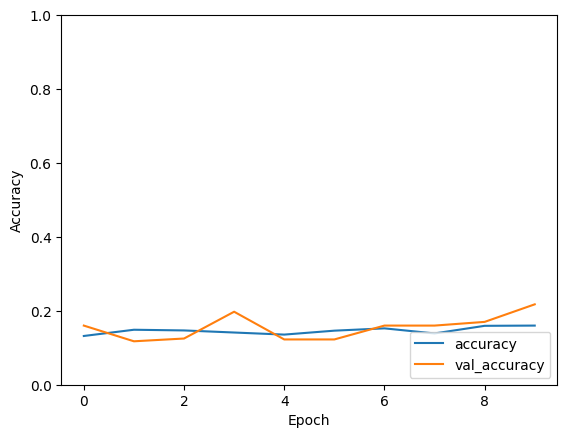

In [51]:
# Build the ResNet50 model
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 classes for your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### 3) DenseNet model

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 546ms/step - accuracy: 0.2201 - loss: 2.2932 - val_accuracy: 0.4300 - val_loss: 1.5088
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.4169 - loss: 1.5602 - val_accuracy: 0.4425 - val_loss: 1.4701
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.4056 - loss: 1.5257 - val_accuracy: 0.4500 - val_loss: 1.3680
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4455 - loss: 1.4434 - val_accuracy: 0.5050 - val_loss: 1.3200
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5056 - loss: 1.3376 - val_accuracy: 0.4600 - val_loss: 1.3135
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4968 - loss: 1.3282 - val_accuracy: 0.4525 - val_loss: 1.3341
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5185 - loss: 1.2671 - val_accuracy: 0.4900 - val_loss: 1.3020
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step -

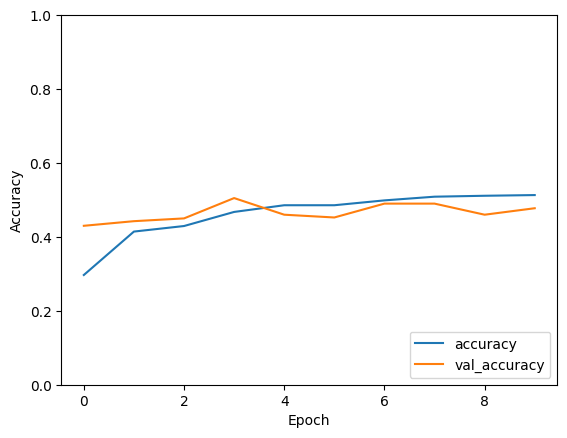

In [52]:
base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 classes for your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### 4) EfficientNet-B3 Model

In [53]:
!pip install -U efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [54]:
import efficientnet.tfkeras as efn

In [55]:
base_model = efn.EfficientNetB3(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 classes for your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


44107200/44107200 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [56]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 408ms/step - accuracy: 0.2640 - loss: 1.9439 - val_accuracy: 0.4825 - val_loss: 1.4060
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4415 - loss: 1.5132 - val_accuracy: 0.4725 - val_loss: 1.3518
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.4263 - loss: 1.4794 - val_accuracy: 0.4925 - val_loss: 1.3358
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4654 - loss: 1.3970 - val_accuracy: 0.4875 - val_loss: 1.3153
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.4614 - loss: 1.3609 - val_accuracy: 0.4850 - val_loss: 1.3017
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4806 - loss: 1.3358 - val_accuracy: 0.5000 - val_loss: 1.2813
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4863 - loss: 1.3308 - val_accuracy: 0.4975 - val_loss: 1.3125
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4983 - loss: 1.3099 - val_accuracy: 0.4950 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4987 - loss: 1.2488
Test accuracy: 0.4925000071525574


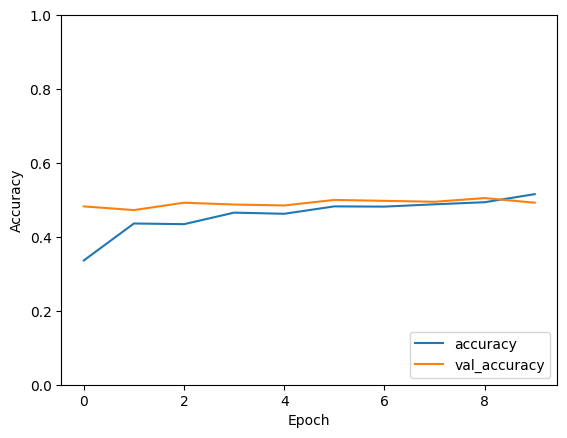

In [57]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#### **Model Interpretation**

From above model training, it can be seen that the EfficientNet-B3 Model worked the Best amoung all 4. Let further Fine-tune the EfficientNet-B3 Model to improve the model accuracy

### **Fine-Tuning Model**

In [58]:
base_model = efn.EfficientNetB3(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 classes for your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 579ms/step - accuracy: 0.3077 - loss: 1.8586 - val_accuracy: 0.4400 - val_loss: 1.4260
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.4294 - loss: 1.4850 - val_accuracy: 0.5050 - val_loss: 1.3172
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4795 - loss: 1.3659 - val_accuracy: 0.5125 - val_loss: 1.3054
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4749 - loss: 1.3393 - val_accuracy: 0.4825 - val_loss: 1.3270
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5068 - loss: 1.2920 - val_accuracy: 0.5175 - val_loss: 1.2718
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5226 - loss: 1.2624 - val_accuracy: 0.4925 - val_loss: 1.3223
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5254 - loss: 1.2357 - val_accuracy: 0.5075 - val_loss: 1.3092
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5265 - loss: 1.2141 - val_accuracy: 0.5050 

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4926 - loss: 1.2765
Test accuracy: 0.5199999809265137


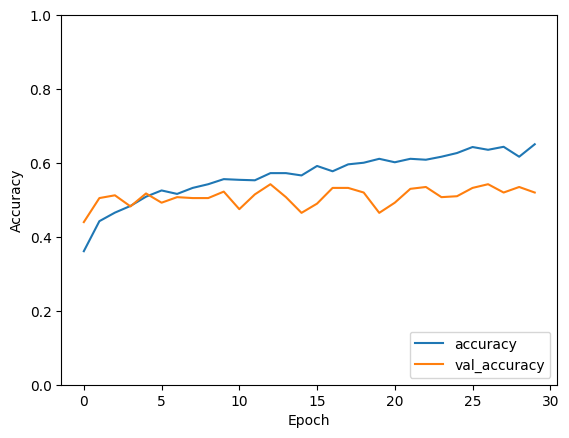

In [59]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()